In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image dimensions: (600, 600, 3)


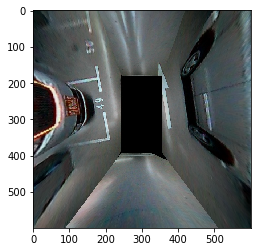

In [2]:
# read image
src = cv2.imread('img/20161019-1-1.bmp')
print('Image dimensions:', src.shape)
plt.imshow(src)

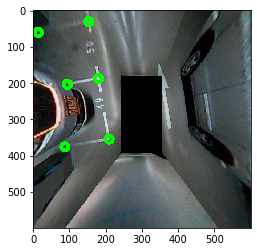

In [3]:
img = np.copy(src)
cv2.circle( img, (209, 355), 10, (0,255,0), 10)
cv2.circle( img, (87, 376), 10, (0,255,0), 10)

cv2.circle( img, (180, 188), 10, (0,255,0), 10)
cv2.circle( img, (94, 204), 10, (0,255,0), 10)

cv2.circle( img, (153, 31), 10, (0,255,0), 10)
cv2.circle( img, (14, 61), 10, (0,255,0), 10)


plt.imshow(img)

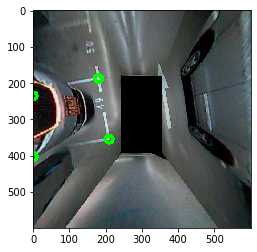

In [4]:
img = np.copy(src)
cv2.circle( img, (209, 355), 10, (0,255,0), 10)
cv2.circle( img, (180, 188), 10, (0,255,0), 10)

cv2.circle( img, (0, 236), 10, (0,255,0), 10)
cv2.circle( img, (0, 403), 10, (0,255,0), 10)

plt.imshow(img)

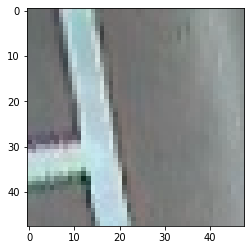

In [14]:
# find patch
n = 24
patch = src[180-n:180+n, 188-n:188+n]
plt.imshow(patch)

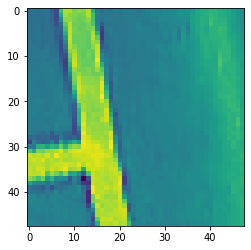

In [17]:
gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [ ]:
# harris conrner
# canny 
# hough
# orb

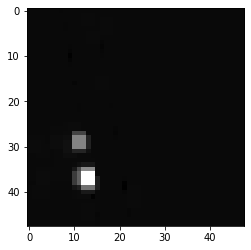

In [18]:
# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

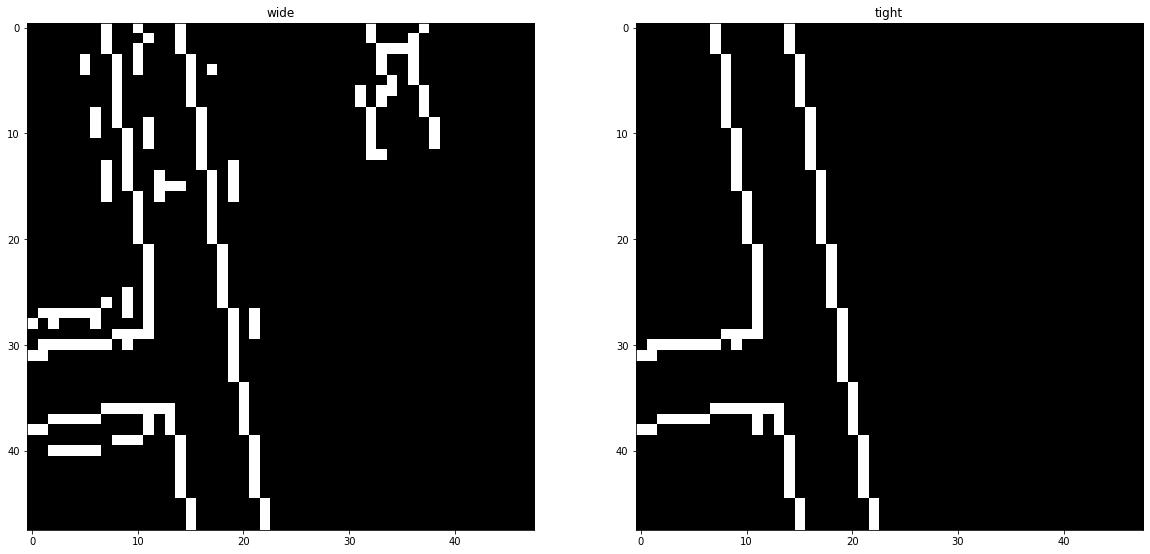

In [74]:
# Try Canny using "wide" and "tight" thresholds
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

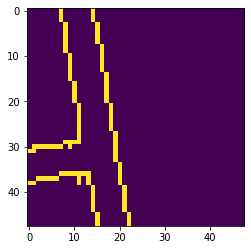

In [75]:
plt.imshow(tight)

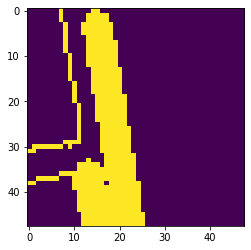

In [76]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on

edges = tight
image = tight

rho = 1
theta = np.pi/180
threshold = 30
min_line_length = 10
max_line_gap = 5

line_image = np.copy(tight) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(tight, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

In [65]:
lines

array([[[14,  0, 22, 47]],

       [[ 8,  5, 10, 20]]], dtype=int32)

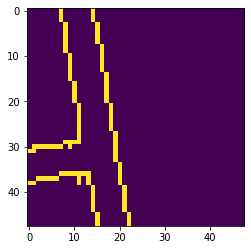

In [49]:
plt.imshow(edges)

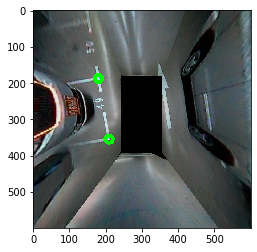

In [41]:
img = np.copy(src)
cv2.circle( img, (209, 355), 10, (0,255,0), 10)
cv2.circle( img, (180, 188), 10, (0,255,0), 10)
plt.imshow(img)

In [98]:
import numpy as np
# get angle
point1 =  [209, 355] 
point2 = [180, 188]
k = (point2[0]-point1[0])/(point2[1]-point1[1])
print(k)

rad = np.arctan(k)
deg = np.degrees(rad) 
print(deg)
angle = 90 - deg

0.17365269461077845
9.851327342808064


In [99]:
img_gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)


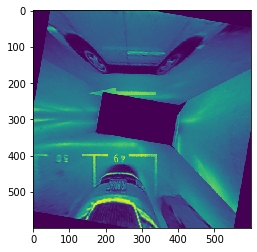

In [100]:
# rotation image

img = np.copy(img_gray)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

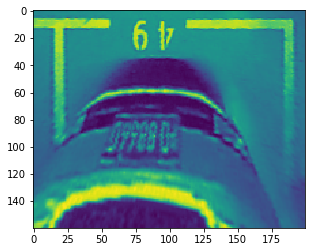

In [113]:
dst2 = dst[390:550,150:350]
plt.imshow(dst2)

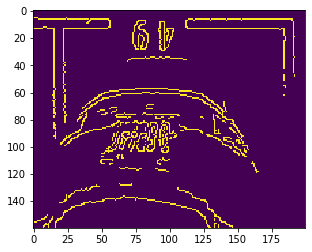

In [117]:
gray = dst2

# Try Canny using "wide" and "tight" thresholds
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
 
    
# Display the images

plt.imshow(tight)

In [103]:
# apply a mask on the region of interest
def region_of_interest(img,vertices):
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 1
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

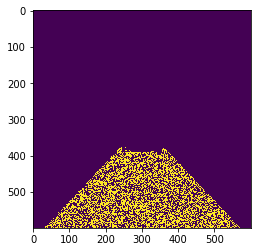

In [107]:
# Test if the region of interest works
img = img_gray # load image
img_x = img.shape[1]
img_y = img.shape[0]

# select mask region
vertices = np.array([[(0.05*img_x,img_y),(0.4*img_x, 0.63*img_y),
                     (0.6*img_x, 0.63*img_y), (0.95*img_x,img_y)]], dtype=np.int32)

# test on color image
img_masked = region_of_interest(img,vertices)

# visualize

plt.imshow(img_masked)



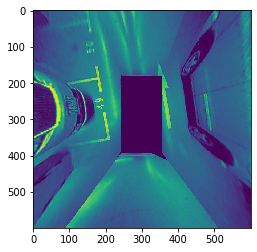

In [106]:
plt.imshow(img_gray)

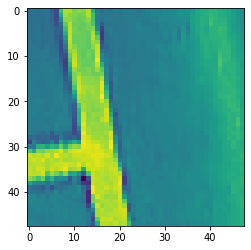

In [118]:
# orb
gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)



(100, 100, 3)


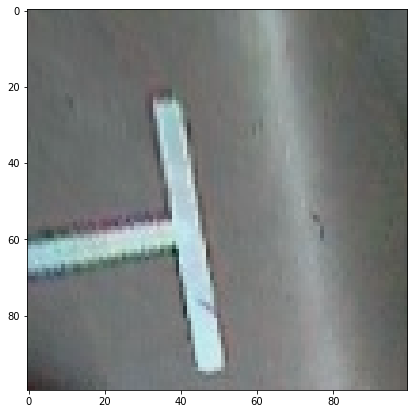

In [151]:
# find patch
n = 50
patch = src[180-n:180+n, 188-n:188+n]
plt.imshow(patch)
print(patch.shape)

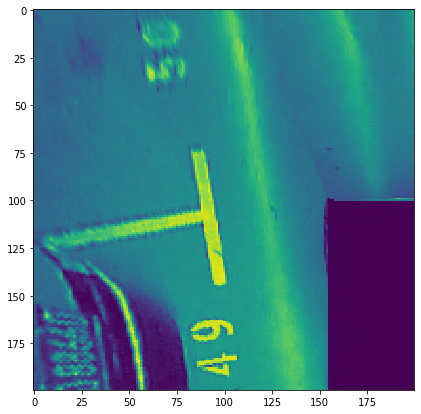

In [149]:
# find patch
n = 100
patch = src[180-n:180+n, 188-n:188+n]
gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [138]:
gray.shape
training_image= np.zeros(training_gray.shape)

In [141]:
x = gray*0

In [142]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

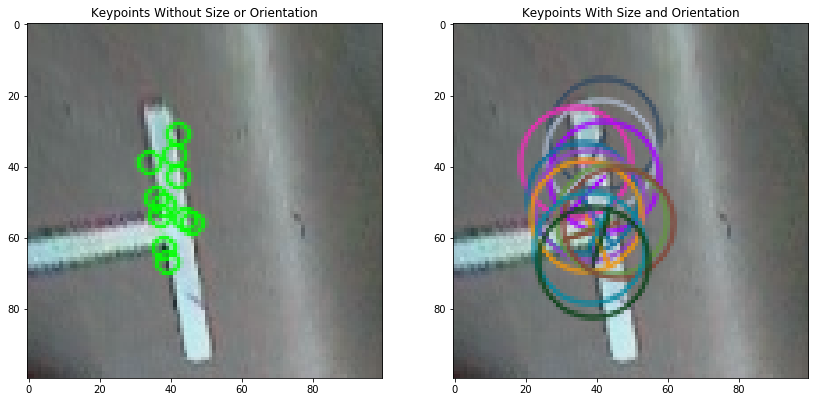


Number of keypoints Detected:  11


In [152]:
training_gray = patch
training_image= patch
# Import copy to make copies of the training image
import copy

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

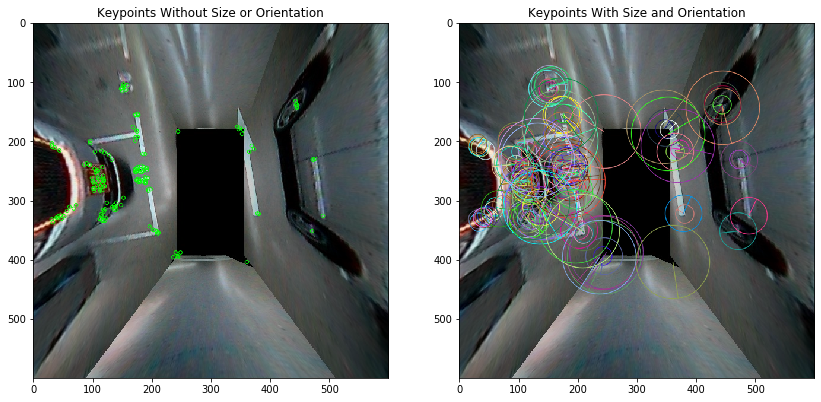


Number of keypoints Detected:  175


In [153]:
training_gray = src
training_image= src
# Import copy to make copies of the training image
import copy

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

# Create copies of the training image to draw our keypoints on
keyp_without_size = copy.copy(training_image)
keyp_with_size = copy.copy(training_image)

# Draw the keypoints without size or orientation on one copy of the training image 
cv2.drawKeypoints(training_image, keypoints, keyp_without_size, color = (0, 255, 0))

# Draw the keypoints with size and orientation on the other copy of the training image
cv2.drawKeypoints(training_image, keypoints, keyp_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with the keypoints without size or orientation
plt.subplot(121)
plt.title('Keypoints Without Size or Orientation')
plt.imshow(keyp_without_size)

# Display the image with the keypoints with size and orientation
plt.subplot(122)
plt.title('Keypoints With Size and Orientation')
plt.imshow(keyp_with_size)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints))

In [144]:

# Import copy to make copies of the training image
import copy

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(200, 2.0)

# Find the keypoints in the gray scale training image and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask.
keypoints, descriptor = orb.detectAndCompute(training_gray, None)

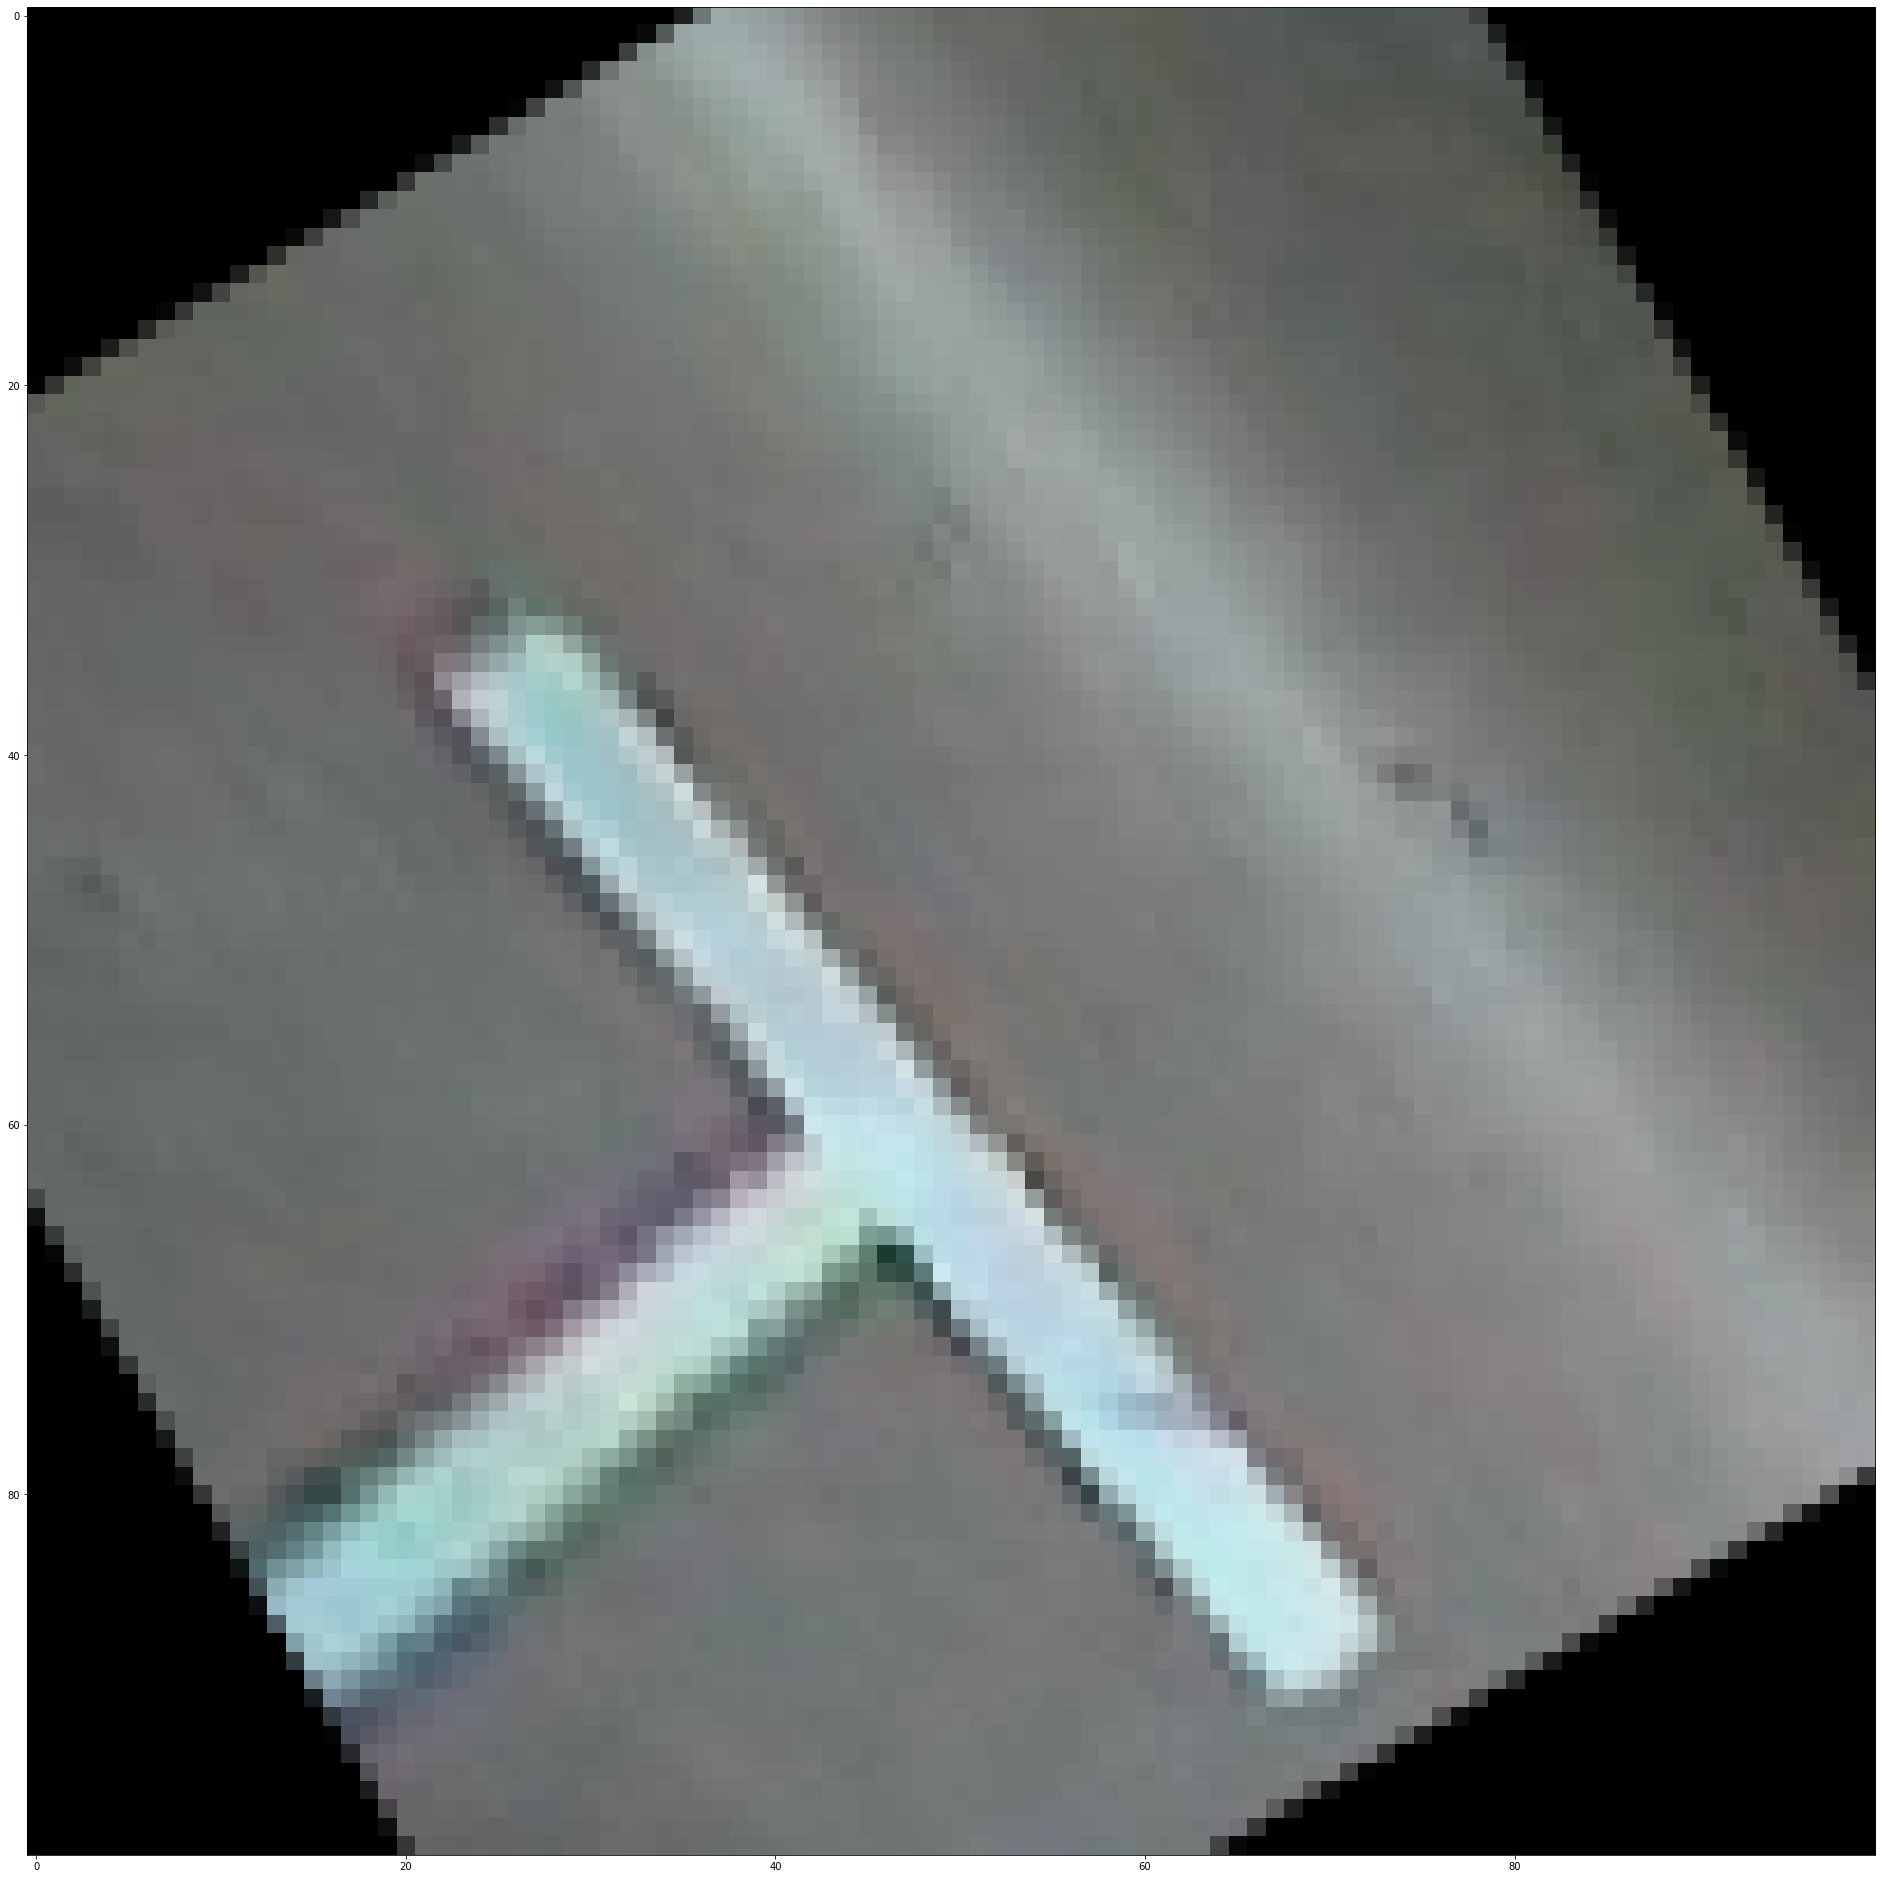

In [164]:
# rotation image
angle = 30
img = np.copy(patch)
rows,cols = img.shape[0], img.shape[1]

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

In [165]:
rows,cols = img.shape[0], img.shape[1]

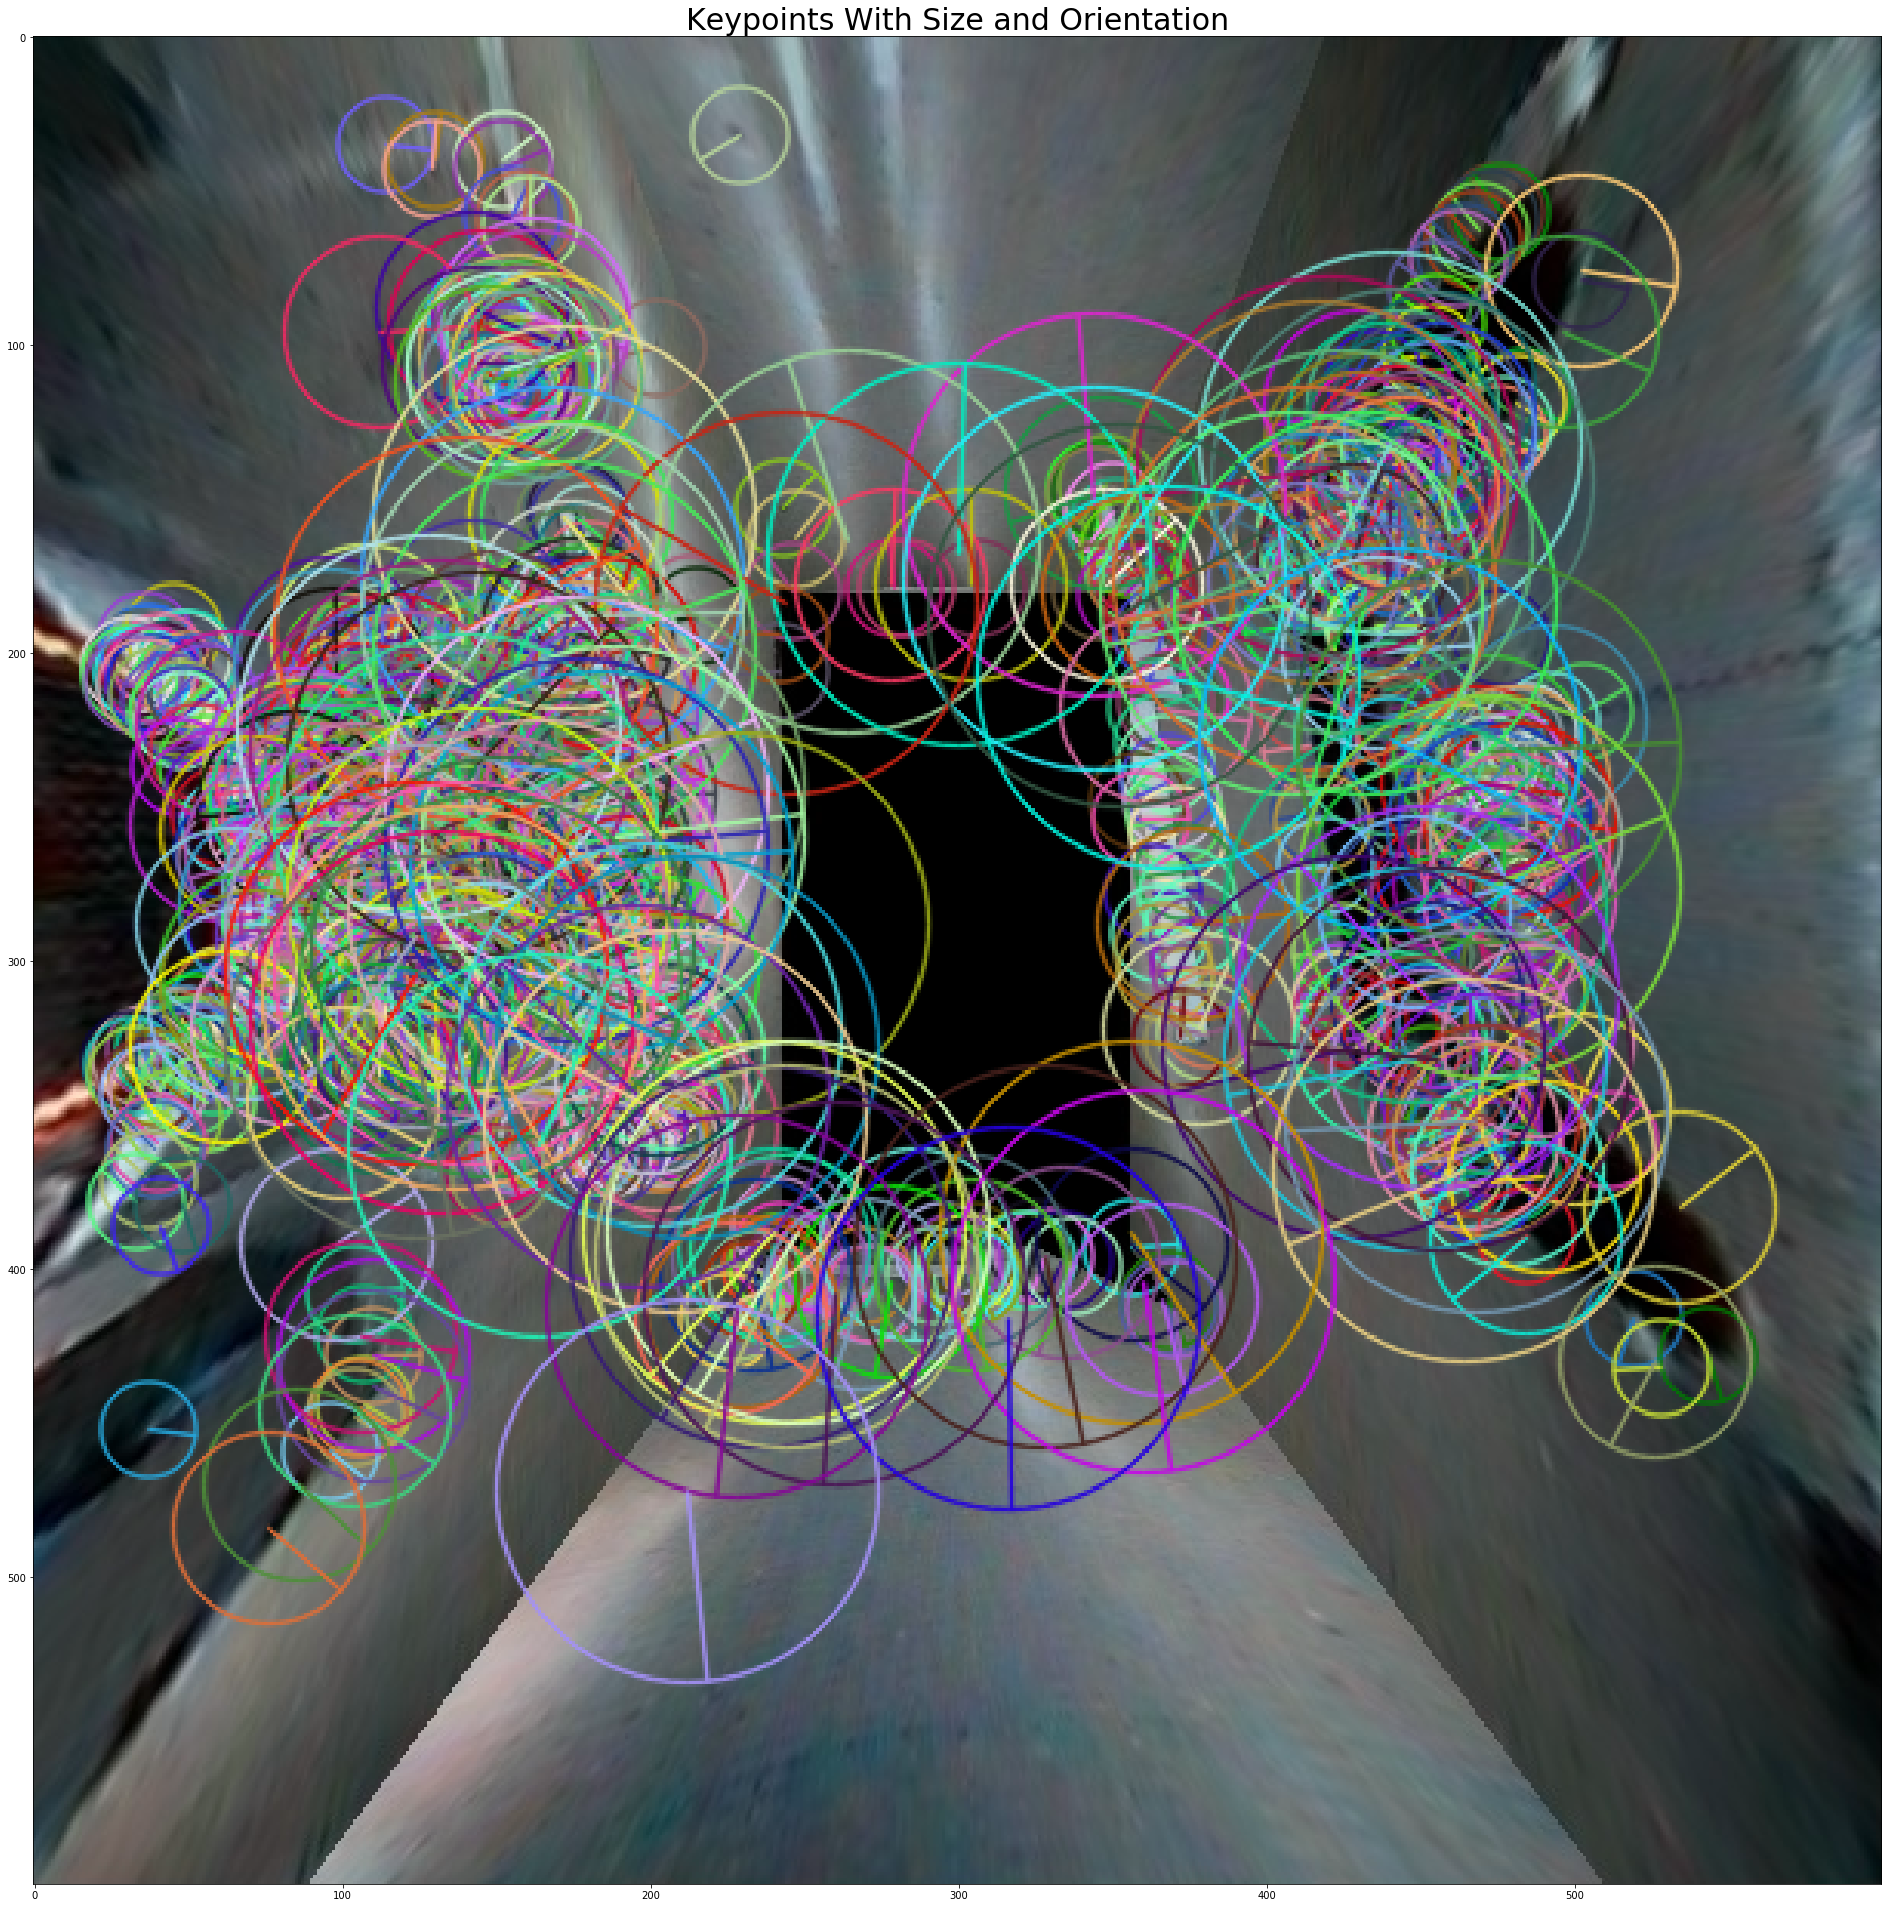


Number of keypoints Detected:  992


In [167]:
training_image = dst
query_image = src

# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(5000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.  
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create copies of the query images to draw our keypoints on
query_img_keyp = copy.copy(query_image)

# Draw the keypoints with size and orientation on the copy of the query image
cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the query image with the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints_query))

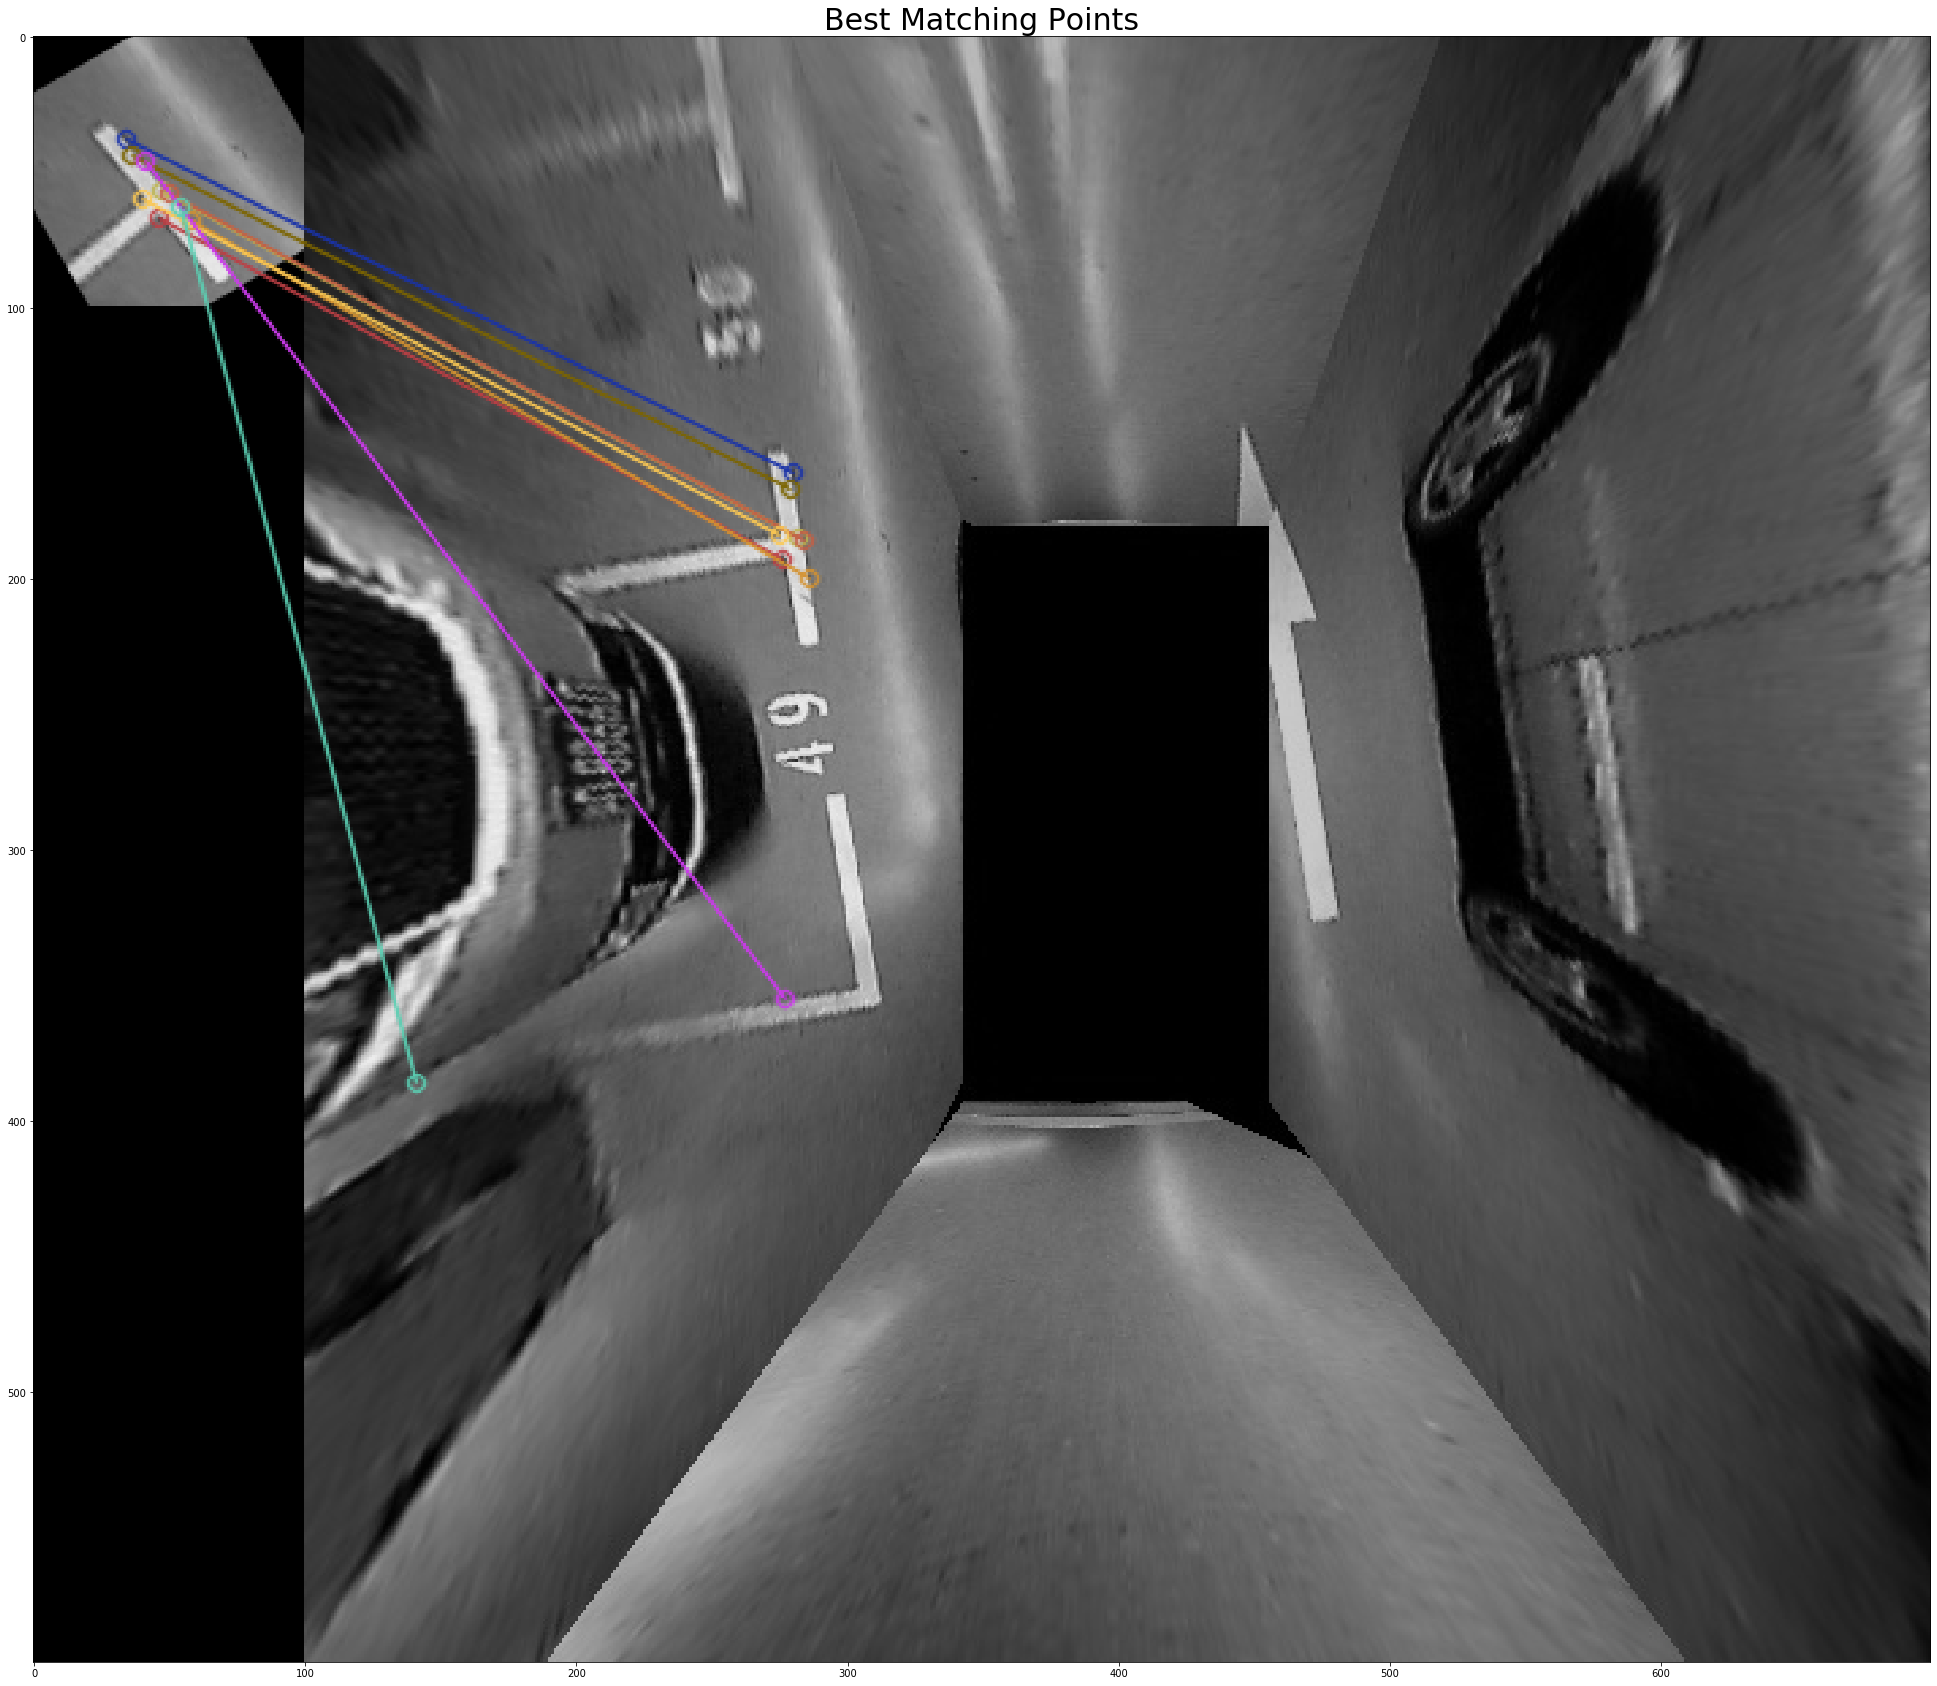

Number of Keypoints Detected In The Training Image:  12
Number of Keypoints Detected In The Query Image:  992

Number of Matching Keypoints Between The Training and Query Images:  9


In [168]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))